# Corrective Gradient Refinement Trajectory Plot vs Odometry
----


In [22]:
import sframe # Graphlab/Turi Sframe
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import yaml

In [8]:
import rosbag

## Intel Dataset

### 5 particles

In [34]:
odom_data = sframe.SFrame('/home/kandithws/Desktop/robio result/intel/5 particle/odom_5_particle.csv')

Finished parsing file /home/kandithws/Desktop/robio result/intel/5 particle/odom_5_particle.csv

Parsing completed. Parsed 100 lines in 0.009777 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/kandithws/Desktop/robio result/intel/5 particle/odom_5_particle.csv

Parsing completed. Parsed 1298 lines in 0.0098 secs.

In [28]:
# The geometry/PoseArray Msg cannot directly export to CSV from rostopic echo -p
# Due to Messege Size inconsistency
def extract_trajectory_sframe_from_pose_array(bagfile, topic):
    bag = rosbag.Bag(bagfile)
    cache = None
    for topic, msg, t in bag.read_messages(topics=[topic]):
    # print msg
        cache = msg

    bag.close()
    traj_pose_headers = {'field.pose.position.x':[], 'field.pose.position.y':[], 
                     'field.pose.position.z':[], 'field.pose.orientation.x':[], 
                     'field.pose.orientation.y':[],'field.pose.orientation.z':[],
                     'field.pose.orientation.w':[]}

    for pose in cache.poses:
        traj_pose_headers['field.pose.position.x'].append(pose.position.x)
        traj_pose_headers['field.pose.position.y'].append(pose.position.y)
        traj_pose_headers['field.pose.position.z'].append(pose.position.z)
        traj_pose_headers['field.pose.orientation.x'].append(pose.orientation.x)
        traj_pose_headers['field.pose.orientation.y'].append(pose.orientation.y)
        traj_pose_headers['field.pose.orientation.z'].append(pose.orientation.z)
        traj_pose_headers['field.pose.orientation.w'].append(pose.orientation.w)

    return sframe.SFrame(traj_pose_headers)

In [30]:
traj_data = extract_trajectory_sframe_from_pose_array('/home/kandithws/Desktop/robio result/intel/5 particle/slam_log_2017-07-04-13-30-36.bag', '/best_particle_trajectory')

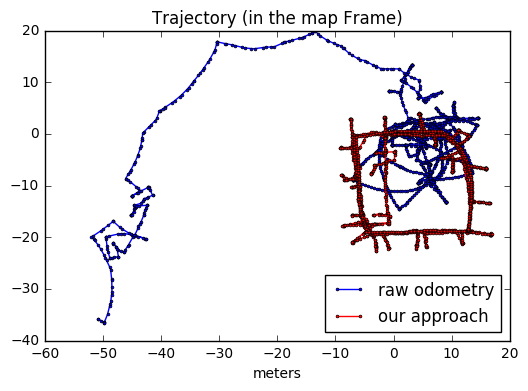

In [72]:
plt.figure()
plt.plot(odom_data['field.pose.position.x'], odom_data['field.pose.position.y'], '-bo', 
         markersize=2, label='raw odometry')
plt.plot(traj_data['field.pose.position.x'], traj_data['field.pose.position.y'], '-ro',
         markersize=2, label='our approach')
# plt.plot(x=odom_data['field.pose.position.x'], y=odom_data['field.pose.position.y'], c='r')
# plt.plot(x=traj_data['field.pose.position.x'], y=traj_data['field.pose.position.y'], c='b')
plt.legend(loc='lower right')
plt.title('Trajectory (in the map Frame)')
plt.xlabel('meters')
plt.ylabel('', fontsize=16)

In [35]:
odom_data

%time,field.header.seq,field.header.stamp,field.header.frame_id,field.pose.position.x,field.pose.position.y
976052857349017042,0,976052857337530016,odom,0.0,0.0
976052886832391994,1,976052886581874966,odom,0.341,-0.007
976052888565078437,2,976052888372557997,odom,0.703,-0.015
976052890660636717,3,976052890445780038,odom,0.697,-0.014
976052891798669161,4,976052891565788030,odom,0.699,-0.017
976052893007824369,5,976052892765064001,odom,0.697,-0.011
976052894972754341,6,976052894779245972,odom,0.695,0.008
976052896584799056,7,976052896365810990,odom,0.704,0.027
976052898802279374,8,976052898601112008,odom,0.72,0.037
976052898993631731,9,976052898794432997,odom,0.725,0.038


# Freiburg Campus Dataset (20 Particles)

In [1]:
import sframe # Graphlab/Turi Sframe
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import yaml
import rosbag

[INFO] sframe.cython.cy_server: SFrame v2.1 started. Logging /tmp/sframe_server_1499573419.log


In [2]:
odom_data = sframe.SFrame('/home/kandithws/Desktop/robio result/freiburg_campus/odom.csv')

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/kandithws/Desktop/robio result/freiburg_campus/odom.csv

Parsing completed. Parsed 3003 lines in 0.011907 secs.

In [6]:
freiburg_traj = None
with open("/home/kandithws/Desktop/robio result/freiburg_campus/cgr_path.yaml", 'r') as stream:
    try:
        freiburg_traj = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [12]:
freiburg_traj['poses'][0]['position']['x']

13.7765290124

In [13]:
traj_pose_headers = {'field.pose.position.x':[], 'field.pose.position.y':[], 
                     'field.pose.position.z':[], 'field.pose.orientation.x':[], 
                     'field.pose.orientation.y':[],'field.pose.orientation.z':[],
                     'field.pose.orientation.w':[]}

for pose in freiburg_traj['poses']:
    traj_pose_headers['field.pose.position.x'].append(pose['position']['x'])
    traj_pose_headers['field.pose.position.y'].append(pose['position']['y'])
    traj_pose_headers['field.pose.position.z'].append(pose['position']['z'])
    traj_pose_headers['field.pose.orientation.x'].append(pose['orientation']['x'])
    traj_pose_headers['field.pose.orientation.y'].append(pose['orientation']['y'])
    traj_pose_headers['field.pose.orientation.z'].append(pose['orientation']['z'])
    traj_pose_headers['field.pose.orientation.w'].append(pose['orientation']['w'])
    
traj_data = sframe.SFrame(traj_pose_headers)
    

In [14]:
traj_data

field.pose.orientation.w,field.pose.orientation.x,field.pose.orientation.y,field.pose.orientation.z
0.995812493372,0.0,0.0,-0.0914192432881
0.996909972201,0.0,0.0,-0.0785525768285
0.999344923392,0.0,0.0,-0.0361901104014
0.999925601847,0.0,0.0,-0.0121979822758
0.999952331497,0.0,0.0,-0.00976395070639
0.999970228751,0.0,0.0,-0.00771632116572
0.999987530008,0.0,0.0,-0.00499397914495
0.999988948578,0.0,0.0,-0.00470135315251
0.999996621982,0.0,0.0,-0.00259923554969
0.999998356461,0.0,0.0,-0.00181302932833


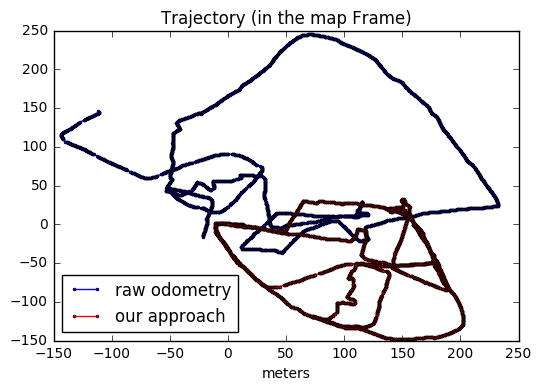

In [16]:
plt.figure()
plt.plot(odom_data['field.pose.position.x'], odom_data['field.pose.position.y'], '-bo', 
         markersize=2, label='raw odometry')
plt.plot(traj_data['field.pose.position.x'], traj_data['field.pose.position.y'], '-ro',
         markersize=2, label='our approach')
# plt.plot(x=odom_data['field.pose.position.x'], y=odom_data['field.pose.position.y'], c='r')
# plt.plot(x=traj_data['field.pose.position.x'], y=traj_data['field.pose.position.y'], c='b')
plt.legend(loc='lower left')
plt.title('Trajectory (in the map Frame)')
plt.xlabel('meters')
plt.ylabel('', fontsize=16)